In [1]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:05<00:00, 220MB/s]
100% 1.06G/1.06G [00:05<00:00, 192MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [9]:
#Training generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
# Vlidation Generators

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


directory: Specifies the path to the directory containing your training images.

labels='inferred': Automatically infers the labels from the subdirectories of the specified directory.

label_mode='int': Specifies that the labels should be represented as integers.

batch_size=32: Sets the batch size for the training data generator.

image_size=(256, 256): Resizes the images to the specified dimensions (256x256 pixels).
Similarly, you've defined a validation data generator:

In [10]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

It looks like you're defining a process function and then using the map method to apply this function to both the training and validation datasets. The purpose of this function appears to be normalizing the pixel values of the images to the range [0, 1].

In [11]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 85s 107ms/step - loss: 1.2307 - accuracy: 0.5995 - val_loss: 0.7682 - val_accuracy: 0.6262
Epoch 2/10
625/625 [==============================] - 69s 110ms/step - loss: 0.5552 - accuracy: 0.7193 - val_loss: 0.6184 - val_accuracy: 0.6142
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4806 - accuracy: 0.7732 - val_loss: 0.4909 - val_accuracy: 0.7728
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4111 - accuracy: 0.8140 - val_loss: 0.4638 - val_accuracy: 0.7724
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3424 - accuracy: 0.8510 - val_loss: 0.5320 - val_accuracy: 0.7406
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2607 - accuracy: 0.8903 - val_loss: 0.6658 - val_accuracy: 0.7754
Epoch 7/10
625/625 [==============================] - 68s 107ms/step - loss: 0.1932 - accuracy: 0.9232 - val_loss: 0.5932 - val_ac

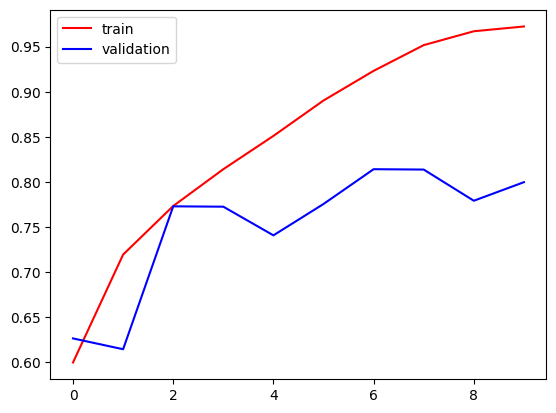

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

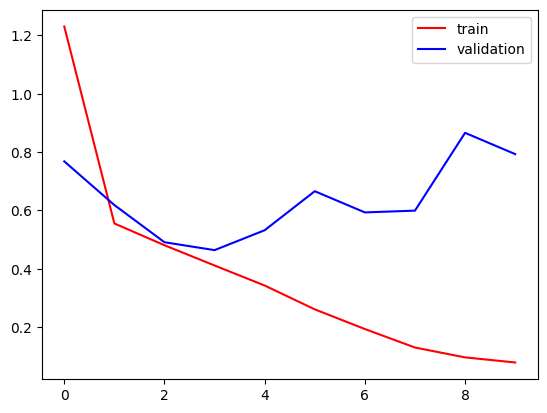

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [18]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [19]:
import cv2

In [20]:
test_img = cv2.imread('/content/cat.jpg')  # Replace with the actual path to your image

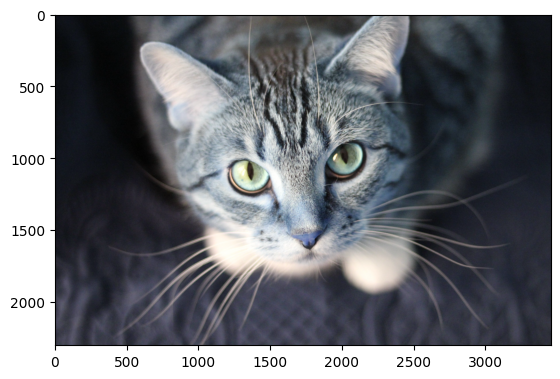

In [21]:
plt.imshow(test_img)

In [22]:
test_img.shape

(2304, 3456, 3)

In [26]:
test_img = cv2.resize(test_img,(256,256))

In [27]:
test_input = test_img.reshape((1,256,256,3))

In [28]:
model.predict(test_input)

1/1 [==============================] - 0s 428ms/step


array([[0.]], dtype=float32)

In [29]:
# O shows that it is a Cat and 1 shows that it is a dog

In [30]:
test_img = cv2.imread('/content/dog.jpg')

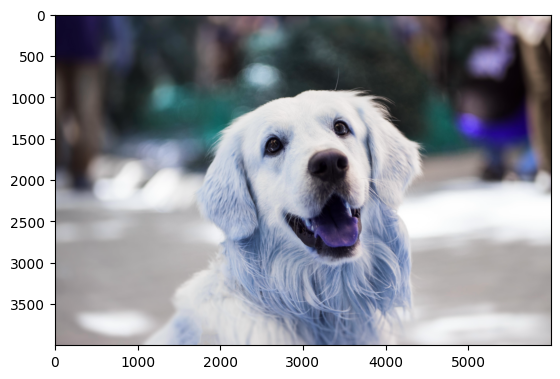

In [31]:
plt.imshow(test_img)

In [32]:
test_img.shape

(4000, 6000, 3)

In [33]:
test_img = cv2.resize(test_img,(256,256))

In [34]:
test_input = test_img.reshape((1,256,256,3))

In [35]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)